
YOLO 작은 객체를 잘 감지  

In [ ]:
#cv2_imshow(cv2_image)

residual block : 잔차 블록, 학습을 하면서 기존 이미지의 특징들이 뭉개질 수 있는데 합성곱 신경망을 거쳐 나온 출력물과 입력물을 더해서 다시 기존 이미지의 특징을 보존한다.  
concatenation : 즉 전처리된 이미지와 전처리 안된 이미지를 연결한다. 예를 들어, 두 개의 10x10x3 크기의 특징 맵을 채널 차원에서 연결하면, 10x10x6 크기의 특징 맵이 생성됨

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
cd darknet

/content/darknet


In [ ]:
!make

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/person.jpg

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv     64       1 x 1/ 1    304 x 304

In [ ]:
import cv2
import matplotlib.pyplot as plt
def show_detection(path):
  image=cv2.imread(path)
  plt.axis('off')
  fig = plt.gcf()
  fig.set_size_inches(14, 8)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

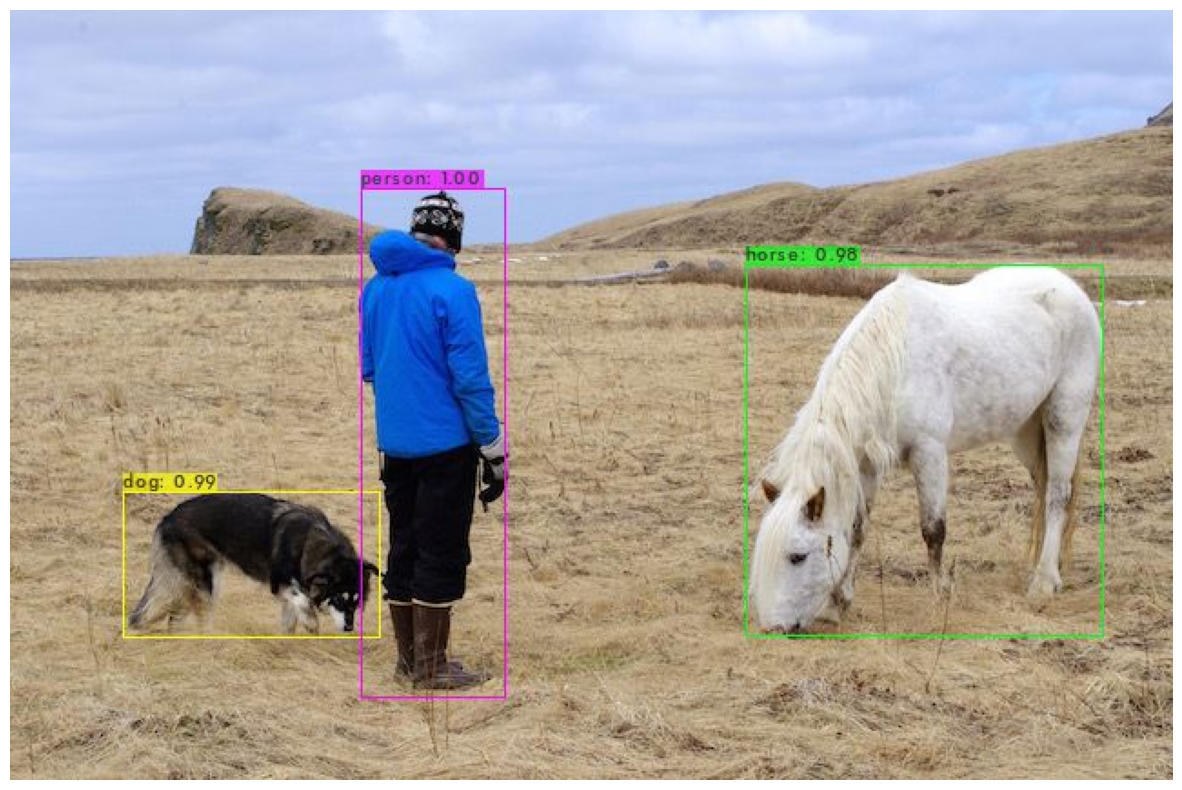

In [ ]:
show_detection('predictions.jpg')

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
!make

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/giraffe.jpg

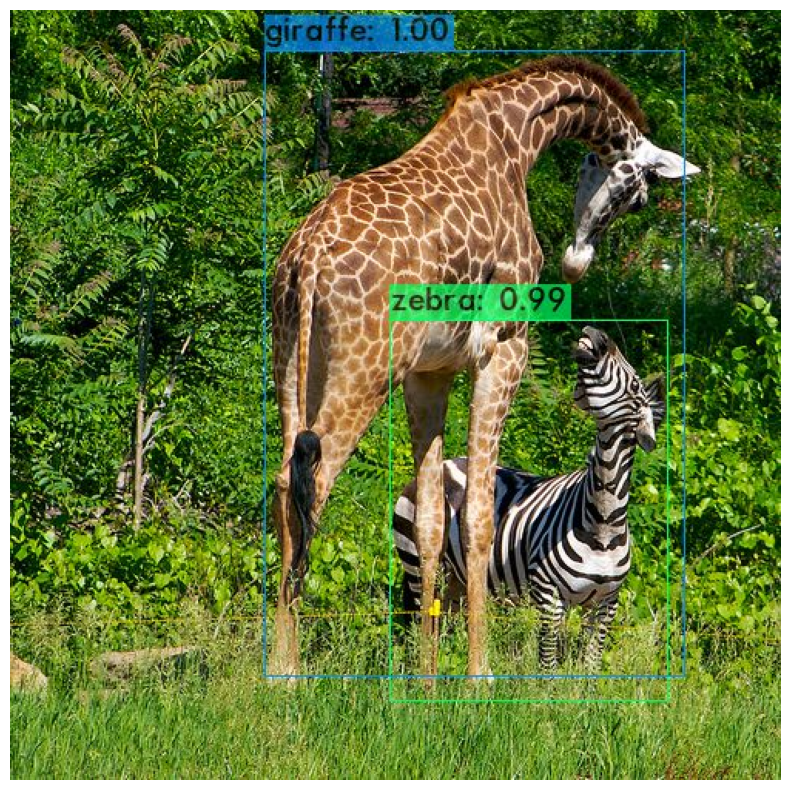

In [ ]:
show_detection('predictions.jpg')

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg

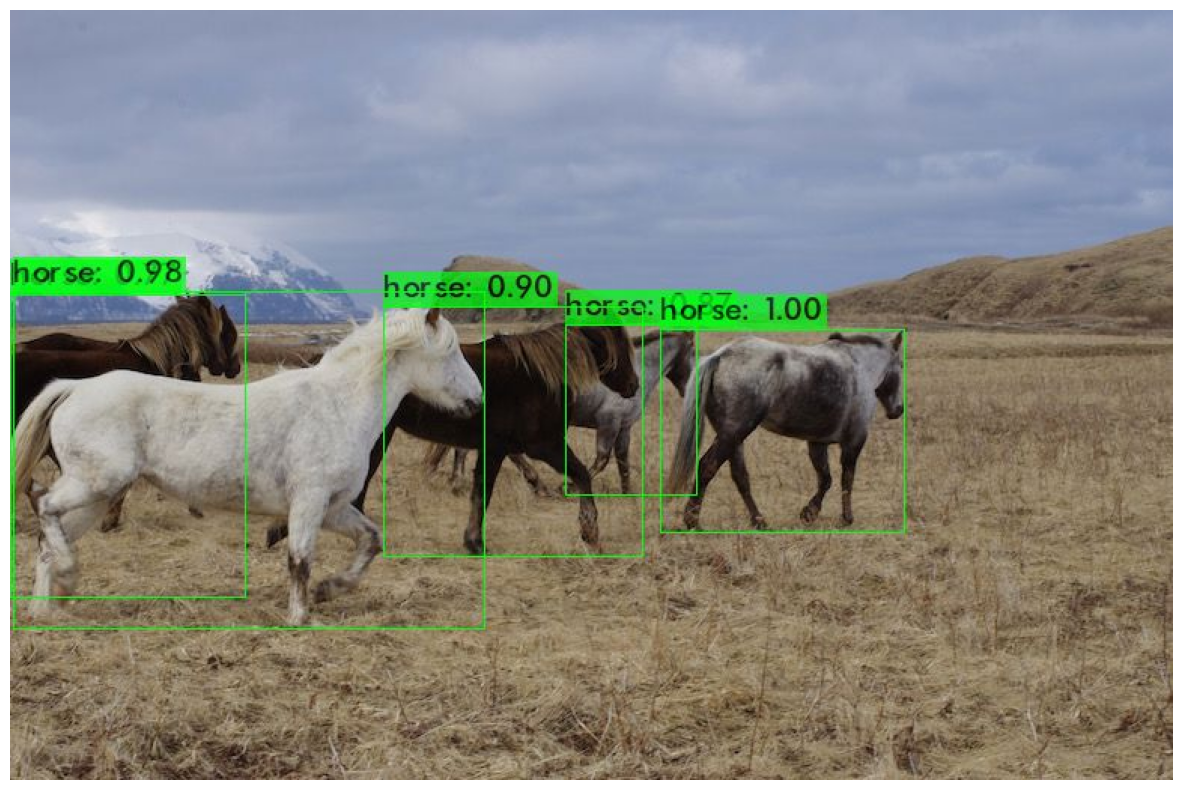

In [ ]:
show_detection('predictions.jpg')

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -thresh 0.9

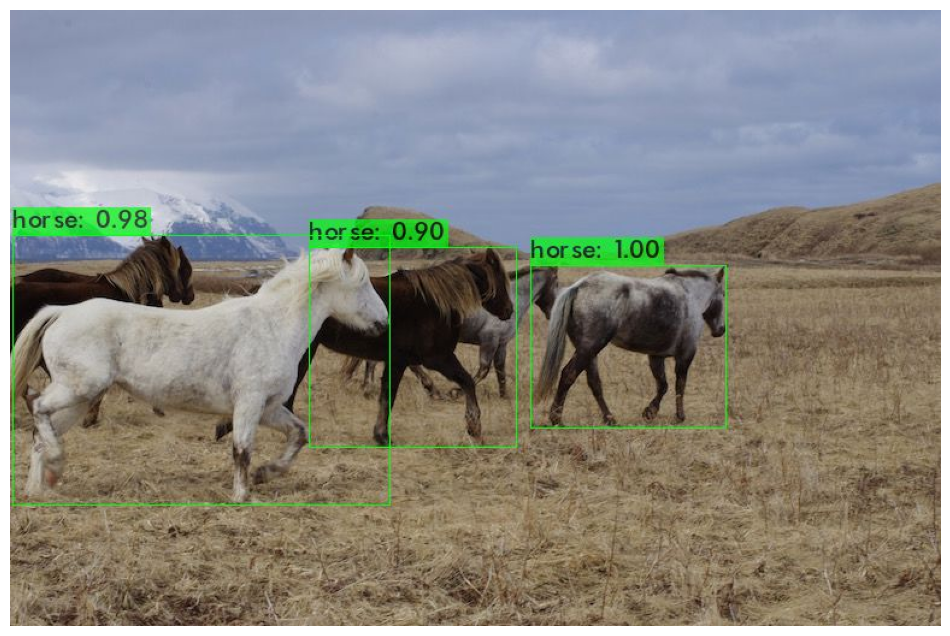

In [ ]:
show_detection('predictions.jpg')

In [ ]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/horses.jpg -EXT-OUTPUT

In [ ]:
print("""[yolo] params: iou loss: ciou (4), iou_norm: 0.07, obj_norm: 1.00, cls_norm: 1.00, delta_norm: 1.00, scale_x_y: 1.05
nms_kind: greedynms (1), beta = 0.600000
Total BFLOPS 128.459
avg_outputs = 1068395
 Allocate additional workspace_size = 52.44 MB
Loading weights from yolov4.weights...
 seen 64, trained: 32032 K-images (500 Kilo-batches_64)
Done! Loaded 162 layers from weights-file
 Detection layer: 139 - type = 28
 Detection layer: 150 - type = 28
 Detection layer: 161 - type = 28
data/horses.jpg: Predicted in 121.176000 milli-seconds.
horse: 77%
horse: 98%
horse: 90%
horse: 87%
horse: 100%
OpenCV exception: show_image_cv """)

[yolo] params: iou loss: ciou (4), iou_norm: 0.07, obj_norm: 1.00, cls_norm: 1.00, delta_norm: 1.00, scale_x_y: 1.05
nms_kind: greedynms (1), beta = 0.600000 
Total BFLOPS 128.459 
avg_outputs = 1068395 
 Allocate additional workspace_size = 52.44 MB 
Loading weights from yolov4.weights...
 seen 64, trained: 32032 K-images (500 Kilo-batches_64) 
Done! Loaded 162 layers from weights-file 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
data/horses.jpg: Predicted in 121.176000 milli-seconds.
horse: 77%
horse: 98%
horse: 90%
horse: 87%
horse: 100%
OpenCV exception: show_image_cv 


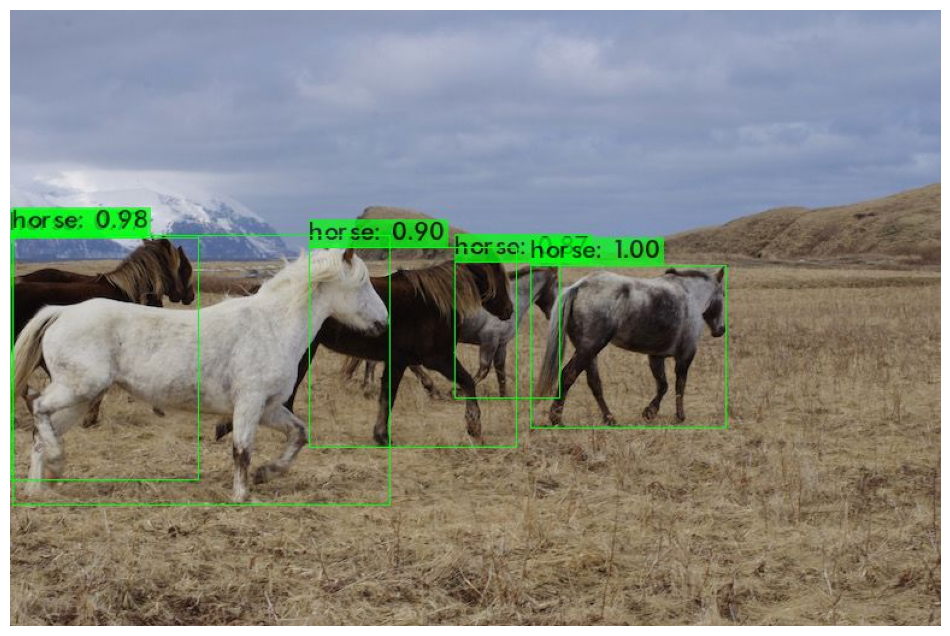

In [ ]:
show_detection('predictions.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!./darknet detector demo cfg/coco.data  cfg/yolov4.cfg yolov4.weights -dont_show /content/drive/MyDrive/ColabDrive/Computer_Vision_Masterclass/Videos/video_street.mp4 -i 0 -out_filename /content/drive/MyDrive/ColabDrive/Computer_Vision_Masterclass/Videos/result_video_street.avi